<a href="https://colab.research.google.com/github/jejec0703/NLP-Natural-Language-Processing/blob/master/6_NLP_%EC%97%B0%EC%8A%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-08-06 04:38:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-08-06 04:38:02 (105 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
import json
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)

In [ ]:
# datastore
### json file 은 딕셔너리구조로 이루어진 text 파일

In [ ]:
sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
len(sentences)

26709

In [ ]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                                maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
                             ])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs,
                    validation_data= (testing_padded, testing_labels),
                    verbose = 2)


Epoch 1/30
625/625 - 2s - loss: 0.6571 - accuracy: 0.6028 - val_loss: 0.5607 - val_accuracy: 0.7222
Epoch 2/30
625/625 - 2s - loss: 0.4245 - accuracy: 0.8340 - val_loss: 0.3842 - val_accuracy: 0.8430
Epoch 3/30
625/625 - 2s - loss: 0.3095 - accuracy: 0.8793 - val_loss: 0.3603 - val_accuracy: 0.8436
Epoch 4/30
625/625 - 2s - loss: 0.2587 - accuracy: 0.9001 - val_loss: 0.3427 - val_accuracy: 0.8563
Epoch 5/30
625/625 - 2s - loss: 0.2236 - accuracy: 0.9138 - val_loss: 0.3701 - val_accuracy: 0.8381
Epoch 6/30
625/625 - 2s - loss: 0.1977 - accuracy: 0.9255 - val_loss: 0.3501 - val_accuracy: 0.8530
Epoch 7/30
625/625 - 2s - loss: 0.1747 - accuracy: 0.9352 - val_loss: 0.3633 - val_accuracy: 0.8556
Epoch 8/30
625/625 - 2s - loss: 0.1565 - accuracy: 0.9438 - val_loss: 0.3742 - val_accuracy: 0.8538
Epoch 9/30
625/625 - 2s - loss: 0.1420 - accuracy: 0.9490 - val_loss: 0.3985 - val_accuracy: 0.8493
Epoch 10/30
625/625 - 2s - loss: 0.1286 - accuracy: 0.9549 - val_loss: 0.4188 - val_accuracy: 0.8465

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])  
  plt.show()

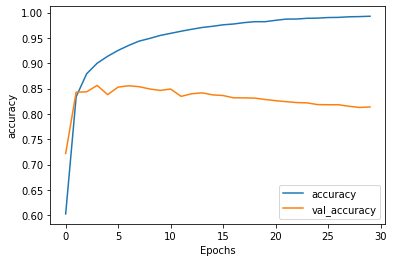

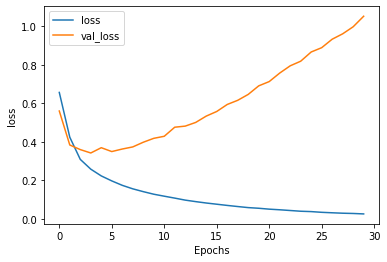

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequence = tokenizer.texts_to_sequences(sentence)
### 감성분석 분류기를 만든 것
padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(model.predict(padded).round(2))

[[0.89]
 [0.  ]]
